In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.parsing.preprocessing import remove_stopwords
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [19]:
data = pd.read_csv('Food Composition.csv',encoding='unicode_escape')
data.head()

,Public Food Key,Food Profile ID,Derivation,Food Name,Food Description,Sampling Details,Nitrogen Factor,Fat Factor,Specific Gravity,Analysed Portion,Unanalysed Portion,Classification,Classification Name
0,F002258,14723,Borrowed,"Cardamom seed, dried, ground",Ground spice commonly used in Indian cooking a...,The majority of nutrient data were borrowed fr...,6.25,0.96,0.0,100%,0%,31302,Herbs(dried) and spices
1,F002963,14718,Borrowed,"Cinnamon, dried, ground",Dried and ground bark or quills of Cinnamomum ...,The majority of nutrient data were borrowed fr...,6.25,0.96,0.0,100%,0%,31302,Herbs(dried) and spices
2,F002970,14725,Borrowed,"Cloves, dried, ground","Dried and ground, unopened flower buds of Syzy...",The majority of nutrient data were borrowed fr...,6.25,0.96,0.0,100%,0%,31302,Herbs(dried) and spices
3,F003190,14727,Borrowed,"Coriander seed, dried, ground",Dried and ground fruit or seed of Coriandrum s...,The majority of nutrient data were borrowed fr...,6.25,0.96,0.0,100%,0%,31302,Herbs(dried) and spices
4,F003327,14728,Borrowed,"Cumin (cummin) seed, dried, ground",Dried and ground fruit or seeds of Cuminum cym...,The majority of nutrient data were borrowed fr...,6.25,0.96,0.0,100%,0%,31302,Herbs(dried) and spices


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Public Food Key      1449 non-null   object 
 1   Food Profile ID      1449 non-null   int64  
 2   Derivation           1449 non-null   object 
 3   Food Name            1449 non-null   object 
 4   Food Description     1449 non-null   object 
 5   Sampling Details     1449 non-null   object 
 6   Nitrogen Factor      1449 non-null   float64
 7   Fat Factor           1449 non-null   float64
 8   Specific Gravity     1449 non-null   float64
 9   Analysed Portion     1449 non-null   object 
 10  Unanalysed Portion   1449 non-null   object 
 11  Classification       1449 non-null   int64  
 12  Classification Name  1449 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 147.3+ KB


In [21]:
data.drop(['Public Food Key','Food Profile ID','Derivation', 'Sampling Details', 'Nitrogen Factor', 'Fat Factor',
       'Specific Gravity', 'Analysed Portion', 'Unanalysed Portion','Classification'],axis=1,inplace=True)
data.head()

,Food Name,Food Description,Classification Name
0,"Cardamom seed, dried, ground",Ground spice commonly used in Indian cooking a...,Herbs(dried) and spices
1,"Cinnamon, dried, ground",Dried and ground bark or quills of Cinnamomum ...,Herbs(dried) and spices
2,"Cloves, dried, ground","Dried and ground, unopened flower buds of Syzy...",Herbs(dried) and spices
3,"Coriander seed, dried, ground",Dried and ground fruit or seed of Coriandrum s...,Herbs(dried) and spices
4,"Cumin (cummin) seed, dried, ground",Dried and ground fruit or seeds of Cuminum cym...,Herbs(dried) and spices


In [22]:
#Remove stopwords, punctuation and numbers
data['Food Name'] = data['Food Name'].apply(lambda text: ' '.join([remove_stopwords(item).translate(str.maketrans('','',string.punctuation))\
                                    .translate(str.maketrans('','',string.digits)) for item in text.split()]))
data.head()

,Food Name,Food Description,Classification Name
0,Cardamom seed dried ground,Ground spice commonly used in Indian cooking a...,Herbs(dried) and spices
1,Cinnamon dried ground,Dried and ground bark or quills of Cinnamomum ...,Herbs(dried) and spices
2,Cloves dried ground,"Dried and ground, unopened flower buds of Syzy...",Herbs(dried) and spices
3,Coriander seed dried ground,Dried and ground fruit or seed of Coriandrum s...,Herbs(dried) and spices
4,Cumin cummin seed dried ground,Dried and ground fruit or seeds of Cuminum cym...,Herbs(dried) and spices


In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
#Stem and make lower case
def stemSentence(sentence):
    porter = PorterStemmer()
    token_words = word_tokenize(sentence)
    stem_sentence = [porter.stem(word) for word in token_words]
    return ' '.join(stem_sentence)

data['Food Name'] = data['Food Name'].apply(lambda text: stemSentence(text))
data.head()

,Food Name,Food Description,Classification Name
0,cardamom seed dri ground,Ground spice commonly used in Indian cooking a...,Herbs(dried) and spices
1,cinnamon dri ground,Dried and ground bark or quills of Cinnamomum ...,Herbs(dried) and spices
2,clove dri ground,"Dried and ground, unopened flower buds of Syzy...",Herbs(dried) and spices
3,coriand seed dri ground,Dried and ground fruit or seed of Coriandrum s...,Herbs(dried) and spices
4,cumin cummin seed dri ground,Dried and ground fruit or seeds of Cuminum cym...,Herbs(dried) and spices


In [26]:
#TF-IDF (word level)
vectorizer = TfidfVectorizer(analyzer='word')
X = vectorizer.fit_transform(data['Food Name'])

Output streaming akan dipotong hingga 5000 baris terakhir.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  Fu

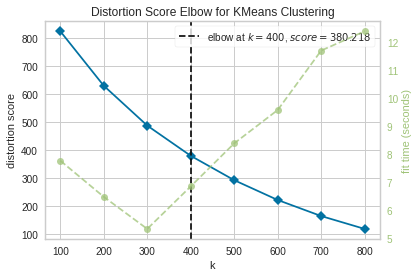

In [27]:
#Elbow method to find numbers of clusters to make
elbow = KElbowVisualizer(KMeans(), k=np.arange(100,900,100))
elbow.fit(X)
elbow.show();

In [28]:
kmeans = KMeans(n_clusters=400)
kmeans.fit(X)
result = pd.concat([data['Food Name'],pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())],axis=1)
result['cluster'] = kmeans.predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
#Label each cluster with the word(s) that all of its food names have in common
clusters = result['cluster'].unique()
labels = []
for i in range(len(clusters)):
    subset = result[result['cluster'] == clusters[i]]
    words = ' '.join([x for x in np.where(subset.all()!=0,subset.columns,None) if x and x!='Name' and x!='cluster' and len(x.split()) == 1])
    labels.append(words)
labels_table = pd.DataFrame(zip(clusters,labels),columns=['cluster','label'])
result_labelled = pd.merge(result,labels_table,on='cluster',how='left')
result_labelled.head()

,Food Name,abalon,abov,acacia,ad,african,albumen,alcohol,alfalfa,allsort,...,yellowey,yellowfin,yellowtail,yoghurt,yoghurtco,yolk,young,zn,cluster,label
0,cardamom seed dri ground,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,
1,cinnamon dri ground,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,253,dri ground
2,clove dri ground,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,253,dri ground
3,coriand seed dri ground,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,
4,cumin cummin seed dri ground,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,


In [31]:
result_labelled.label.value_counts().head()

                      148
pork                   14
breakfast cereal       12
beef sirloin steak     12
oil                    12
Name: label, dtype: int64